In [2]:
# Granger Causality Test
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.stats.diagnostic import unitroot_adf
from sklearn import preprocessing

In [48]:
path = ''

filename = 'data/output_populations_2-1000-l-s.csv'
filename2 = 'data/output_pops_E.csv'
st = 600
ed = 800

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

dfIt = df['iteration']
dfS_1 = df['1']
dfS_2 = df['2']
# dfS_3 = df['3']
# dfS_4 = df['4']
# dfS_5 = df['5']

df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2})

# df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2, 'species_3': dfS_3, 'species_4': dfS_4, 'species_5': dfS_5})
#col_names = df.columns

print(df.head(10))

iteration  species_1  species_2
600        601       6319      54092
601        602       6419      54151
602        603       6520      54212
603        604       6626      54271
604        605       6726      54304
605        606       6845      54334
606        607       6928      54350
607        608       7032      54402
608        609       7109      54454
609        610       7240      54511


In [49]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(dfS_1, autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('The given series data is stable if Test Statistics < Critical Value and p-Value < 0.05 (5.0e-2)')

Dickey-Fuller Test:
Test Statistics        -6.433900e+00
p-Value                 1.671153e-08
#Lags used              5.000000e+00
Observ used             1.940000e+02
Critical Value (1%)    -3.464515e+00
Critical Value (5%)    -2.876556e+00
Critical Value (10%)   -2.574775e+00
dtype: float64
The given series data is stable if Test Statistics < Critical Value and p-Value < 0.05 (5.0e-2)




1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=236.1148, p=0.0000  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=239.7288, p=0.0000  , df=1
likelihood ratio test: chi2=157.3247, p=0.0000  , df=1
parameter F test:         F=236.1148, p=0.0000  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=19.9839 , p=0.0000  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=41.0032 , p=0.0000  , df=2
likelihood ratio test: chi2=37.2655 , p=0.0000  , df=2
parameter F test:         F=19.9839 , p=0.0000  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.8247 , p=0.0000  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=36.7811 , p=0.0000  , df=3
likelihood ratio test: chi2=33.7227 , p=0.0000  , df=3
parameter F test:         F=11.8247 , p=0.0000  , df_denom=190, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.8748  

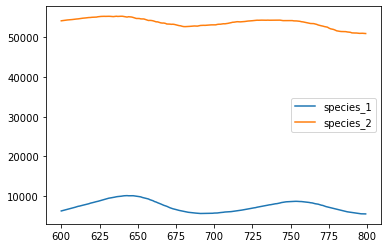

In [47]:
maxlag = [1]
def GCT(dataframe):
    print('\n\n1 eats 2?')
    grangercausalitytests(dataframe[['species_1', 'species_2']], maxlag=maxlag)
    print('\n\n2 eats 1?')
    grangercausalitytests(dataframe[['species_2', 'species_1']], maxlag=maxlag)
    dataframe[['species_1', 'species_2']].plot()

    # print('\n\n1 eats 3?')
    # grangercausalitytests(dataframe[['species_1', 'species_3']], maxlag=[maxlag])
    # print('\n\n3 eats 1?')
    # grangercausalitytests(dataframe[['species_3', 'species_1']], maxlag=[maxlag])
    # dataframe[['species_1', 'species_3']].plot()

    # print('\n\n2 eats 3?')
    # grangercausalitytests(dataframe[['species_2', 'species_3']], maxlag=[maxlag])
    # print('\n\n3 eats 2?')
    # grangercausalitytests(dataframe[['species_3', 'species_2']], maxlag=[maxlag])
    # dataframe[['species_2', 'species_3']].plot()

    # 'SSR' = Residual Sum of Squares
    # 'SSR based F test' and 'parameter F test' turn out to be the same and is what R reports (and is verified against R, IIRC).
    # statsmodels.tsa.stattools.grangercausalitytests uses the degrees of freedom definition for a single ordinary least square (OLS estimate. 
    # works only for bivariate case.
    # 'SSR based F test' compares SSR between restricted and unrestricted model
    # 'parameter F test' builds a restriction matrix and uses the f_test of the unrestricted results instance.
    # 'parameter F test', 'SSR based F test' are based on F distribution
    # 'ssr based chi2 test', 'likelihood ratio test' are based on chi-square distribution

GCT(df)

species_1  species_2
0  -0.898404   0.393890
1  -0.825651   0.445586
2  -0.752171   0.499034
3  -0.675052   0.550730
4  -0.602300   0.579644
5  -0.515724   0.605930
6  -0.455339   0.619949
7  -0.379676   0.665511
8  -0.323656   0.711074
9  -0.228350   0.761017


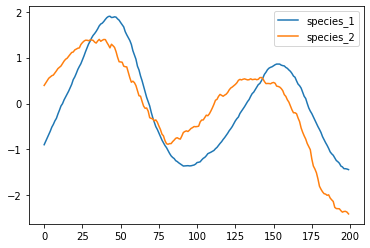

In [50]:
# Standardisation

# Create the Scaler object
scaler = preprocessing.StandardScaler()
test = df.drop(columns=['iteration'])
scaled_df = scaler.fit_transform(test)
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

print(scaled_df.head(10))
#scaled_df[['species_1','species_2','species_3','species_4','species_5']].plot()
scaled_df[['species_1','species_2']].plot()

species_1  species_2  species_3  species_4  species_5
0    0.399318   1.174307  -0.136930  -2.277448   0.654320
10  -0.383297   0.400171   0.407458  -2.444151   0.197041
20  -0.740491  -0.414443   0.766292  -2.299278  -0.168782
30  -0.977282  -0.977757   0.972621  -2.028387  -0.808972
40  -1.196013  -1.264474   1.034001  -1.521334  -0.031598
50  -1.342502  -1.313385   0.940515  -1.017258  -0.626060
60  -1.262234  -1.176772   0.549103  -0.486391  -1.220522
70  -1.007382  -1.004742  -0.151567  -0.040859  -0.900427
80  -0.870926  -0.658995  -1.001436   0.342159   1.111599
90  -0.333129  -0.126039  -1.625145   0.575344   1.157326


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9981  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9981  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9981  , df=1
parameter F test:         F=0.0000  , p=0.9981  , df_denom=96, df_num=1


2 eats 1?

Granger Causality
number of lags (no zero

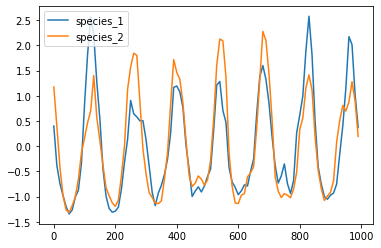

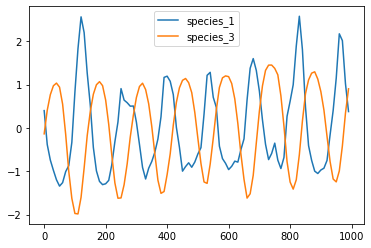

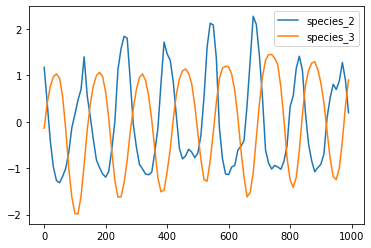

In [41]:
df_10 = scaled_df.filter(items=[i for i in range(ed-st) if i%10==0], axis=0)
#df_10.reset_index(inplace=True)
print(df_10.head(10))
GCT(df_10)

species_1  species_2  species_3  species_4  species_5
0     0.399318   1.174307  -0.136930  -2.277448   0.654320
50   -1.342502  -1.313385   0.940515  -1.017258  -0.626060
100   0.826747   0.162364  -1.974064   0.542599   1.660333
150   0.529754   0.110081   0.378185  -2.014495  -0.214509
200  -1.288321  -1.191952   0.642589  -0.234353  -0.854699
250   0.907015   1.572337  -1.614758   0.567406   0.562864
300   0.132427  -0.544309   0.701608  -1.044050  -0.671788
350  -0.774605  -1.082324   0.034932   0.722201  -0.717516
400   1.193974   1.464397  -1.074619   0.224079   1.340238
450  -0.997349  -0.798981   1.098213  -0.410978  -1.174795


1 eats 2?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9601  , p=0.3417  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=1.1401  , p=0.2856  , df=1
likelihood ratio test: chi2=1.1072  , p=0.2927  , df=1
parameter F test:         F=0.9601  , p=0.3417  , df_denom=16, df_num=1


2 eats 1?

Granger Causality
number of lag

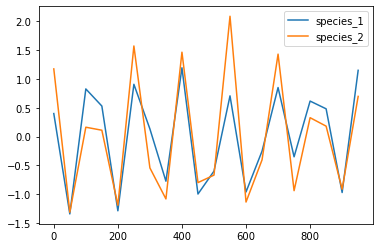

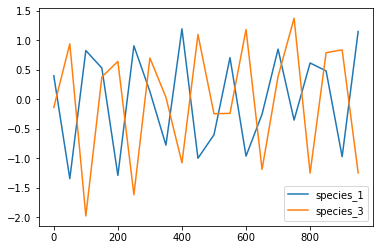

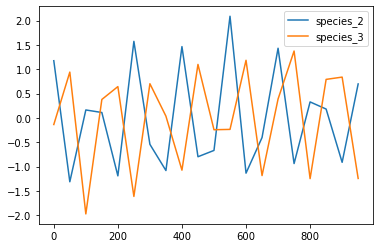

In [42]:
df_50 = scaled_df.filter(items=[i for i in range(ed-st) if i%50==0], axis=0)
#df_50.reset_index(inplace=True)
print(df_50.head(10))
GCT(df_50)